In [2]:
# import folium
import geojson
import pandas as pd
import geopandas as gpd
import contextily as cx
from shapely import LineString
from openquake.hazardlib.geo import Point, Line
from openquake.hazardlib.geo.geodetic import azimuth
from openquake.hazardlib.geo.surface.kite_fault import get_profiles_from_simple_fault_data, KiteSurface

In [3]:
fname = './sample.geojson'
# Sampling distance used to create the profiles
rupture_mesh_spacing = 2.

In [4]:
# Read .geojson file with fault info
with open(fname) as f:
    data = geojson.load(f)

In [5]:
# Get geodataframe
def get_geodataframe(profiles):
    lss = []
    for ipro, pro in enumerate(profiles):
        ls = get_linestring(pro)
        lss.append(ls)
    data = {'geometry': lss}
    gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")
    return gdf

# Get linestring from OQ Line
def get_linestring(line):
    coo = [(p.longitude, p.latitude, p.depth) for p in line.points]
    ls = LineString(coo)
    return ls

# Get essential data for fault geometry from a geojson feature
def get_data_for_simple_fault(feature):
    coords  = feature['geometry']['coordinates'] 
    trace = Line([Point(p[0], p[1]) for p in coords])
    lsd = feature['properties']['lsd']
    usd = feature['properties']['usd']
    dip = feature['properties']['dip']
    return trace, usd, lsd, dip

In [28]:
gdfs = []
sfcs = 
for feature in data['features']:
    # Create the profiles
    trace, usd, lsd, dip = get_data_for_simple_fault(feature)
    profiles = get_profiles_from_simple_fault_data(trace, usd, lsd, dip, rupture_mesh_spacing)    
    gdfs.append(get_geodataframe(profiles))
    sfc = KiteSurface.from_profiles(profiles, 5, 5)
    

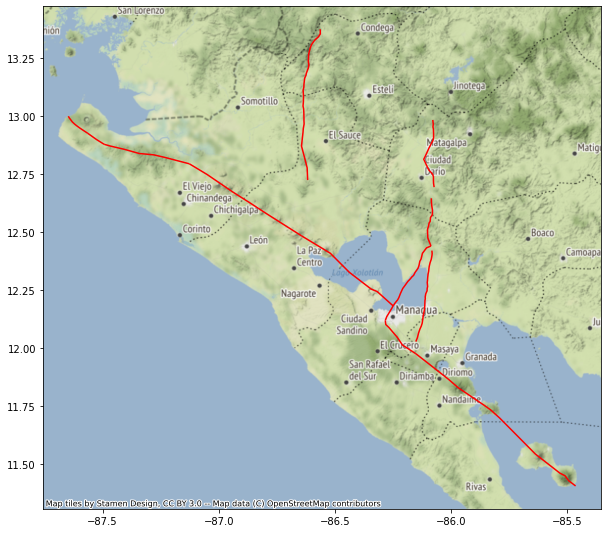

In [25]:
tmp = gpd.read_file(fname)
ax = tmp.plot(figsize=(10, 10), color='red')
cx.add_basemap(ax, crs=tmp.crs.to_string())

In [ ]:
tmp